In [4]:
pip install mediapipe opencv-python

  Using cached mediapipe-0.10.11-cp38-cp38-macosx_11_0_universal2.whl.metadata (9.7 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached jax-0.4.13-py3-none-any.whl
  Using cached jaxlib-0.4.13-cp38-cp38-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
  Using cached sounddevice-0.4.6-py3-none-macosx_10_6_x86_64.macosx_10_6_universal2.whl.metadata (1.4 kB)
  Using cached ml_dtypes-0.2.0-cp38-cp38-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached filelock-3.13.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using ca

In [6]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'google.colab'

In [8]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

RuntimeError: ValidatedGraphConfig Initialization failed.
ImageToTensorCalculator: ; RET_CHECK failure (mediapipe/calculators/tensor/image_to_tensor_calculator.cc:144) ValidateOptionOutputDims(options) returned INTERNAL: ; RET_CHECK failure (./mediapipe/calculators/tensor/image_to_tensor_utils.h:136) options.has_output_tensor_float_range() || options.has_output_tensor_int_range() || options.has_output_tensor_uint_range()Output tensor range is required. 
InferenceCalculatorCpu: ; RET_CHECK failure (mediapipe/calculators/tensor/inference_calculator_cpu.cc:63) !options.model_path().empty() ^ kSideInModel(cc).IsConnected()Either model as side packet or model path in options is required.
SplitDetectionVectorCalculator: The number of output streams should match the number of ranges specified in the CalculatorOptions.
ImageToTensorCalculator: ; RET_CHECK failure (mediapipe/calculators/tensor/image_to_tensor_calculator.cc:144) ValidateOptionOutputDims(options) returned INTERNAL: ; RET_CHECK failure (./mediapipe/calculators/tensor/image_to_tensor_utils.h:136) options.has_output_tensor_float_range() || options.has_output_tensor_int_range() || options.has_output_tensor_uint_range()Output tensor range is required. 
ConstantSidePacketCalculator: ; RET_CHECK failure (mediapipe/calculators/core/constant_side_packet_calculator.cc:64) (cc->OutputSidePackets().NumEntries(kPacketTag))==(options.packet_size())Number of output side packets has to be same as number of packets configured in options.
ConstantSidePacketCalculator: ; RET_CHECK failure (mediapipe/calculators/core/constant_side_packet_calculator.cc:64) (cc->OutputSidePackets().NumEntries(kPacketTag))==(options.packet_size())Number of output side packets has to be same as number of packets configured in options.
ConstantSidePacketCalculator: ; RET_CHECK failure (mediapipe/calculators/core/constant_side_packet_calculator.cc:64) (cc->OutputSidePackets().NumEntries(kPacketTag))==(options.packet_size())Number of output side packets has to be same as number of packets configured in options.
SplitTensorVectorCalculator: The number of output streams should match the number of ranges specified in the CalculatorOptions.
SplitNormalizedLandmarkListCalculator: The number of output streams should match the number of ranges specified in the CalculatorOptions.
SplitLandmarkListCalculator: The number of output streams should match the number of ranges specified in the CalculatorOptions.

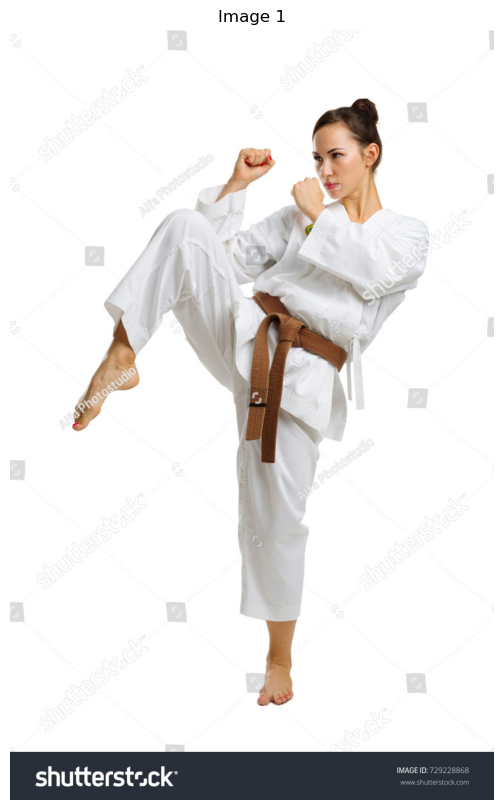

In [9]:
img_1 = cv2.imread('sample Image1.jpg') 

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display.
plt.title("Image 1");plt.axis('off');plt.imshow(img_1[:,:,::-1]);plt.show()

In [10]:
results = pose.process(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterate five times as we only want to display first five landmarks.
    for i in range(5):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NameError: name 'pose' is not defined

In [6]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = img_1.shape

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterate two times as we only want to display first two landmark.
    for i in range(2):

        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 656.8525224924088
y: 295.4160690307617
z: -187.12594605982304
visibility: 0.999618411064148

LEFT_EYE_INNER:
x: 672.5102412700653
y: 268.0837154388428
z: -177.3470152169466
visibility: 0.9992024302482605



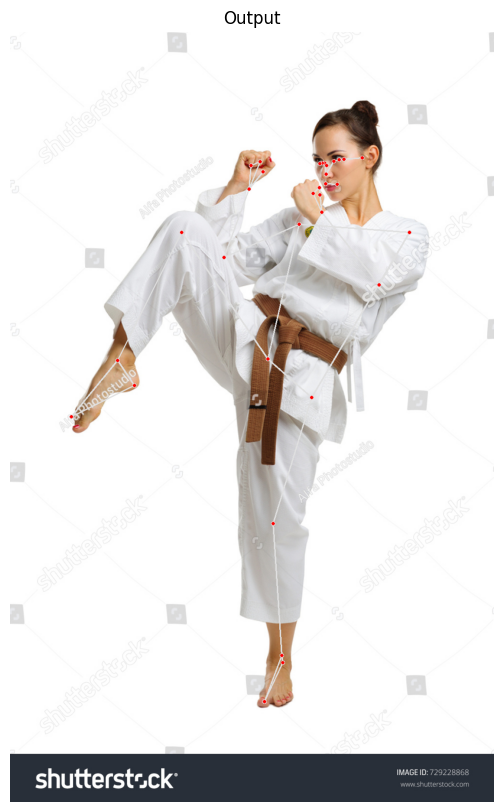

In [7]:
# Create a copy of the sample image to draw landmarks on.
img_copy = img_1.copy()

# Check if any landmarks are found.
if results.pose_landmarks:

    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display.
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

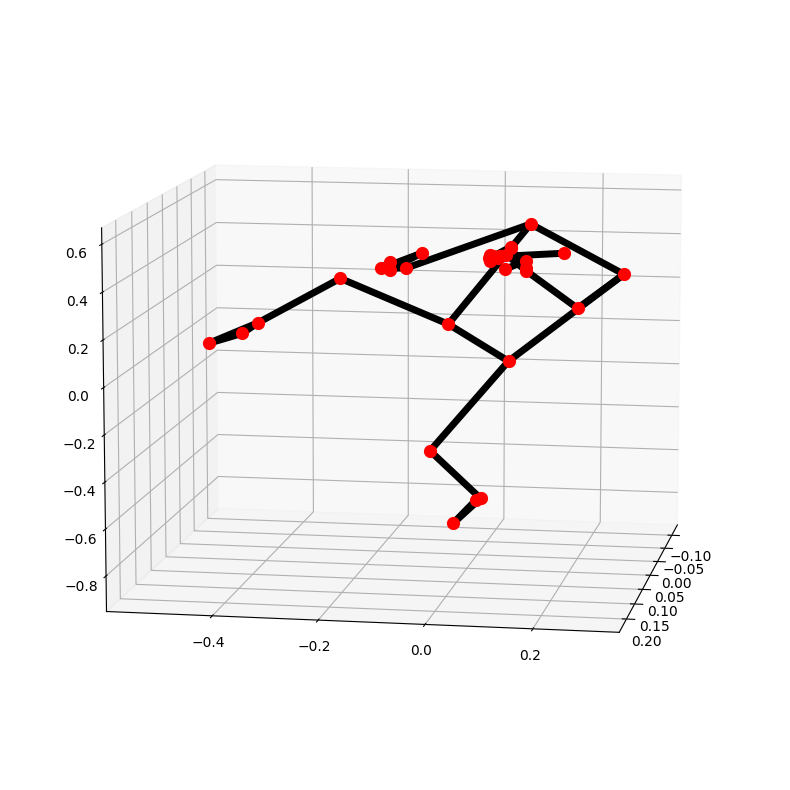

In [8]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [9]:
def detectPose(image, pose, display=True):

    # Create a copy of the input image.
    output_image = image.copy()

    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform the Pose Detection.
    results = pose.process(imageRGB)

    # Retrieve the height and width of the input image.
    height, width, _ = image.shape

    # Initialize a list to store the detected landmarks.
    landmarks = []

    # Check if any landmarks are detected.
    if results.pose_landmarks:

        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)

        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:

            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))

    # Check if the original input image and the resultant image are specified to be displayed.
    if display:

        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # Otherwise
    else:

        # Return the output image and the found landmarks.
        return output_image, landmarks

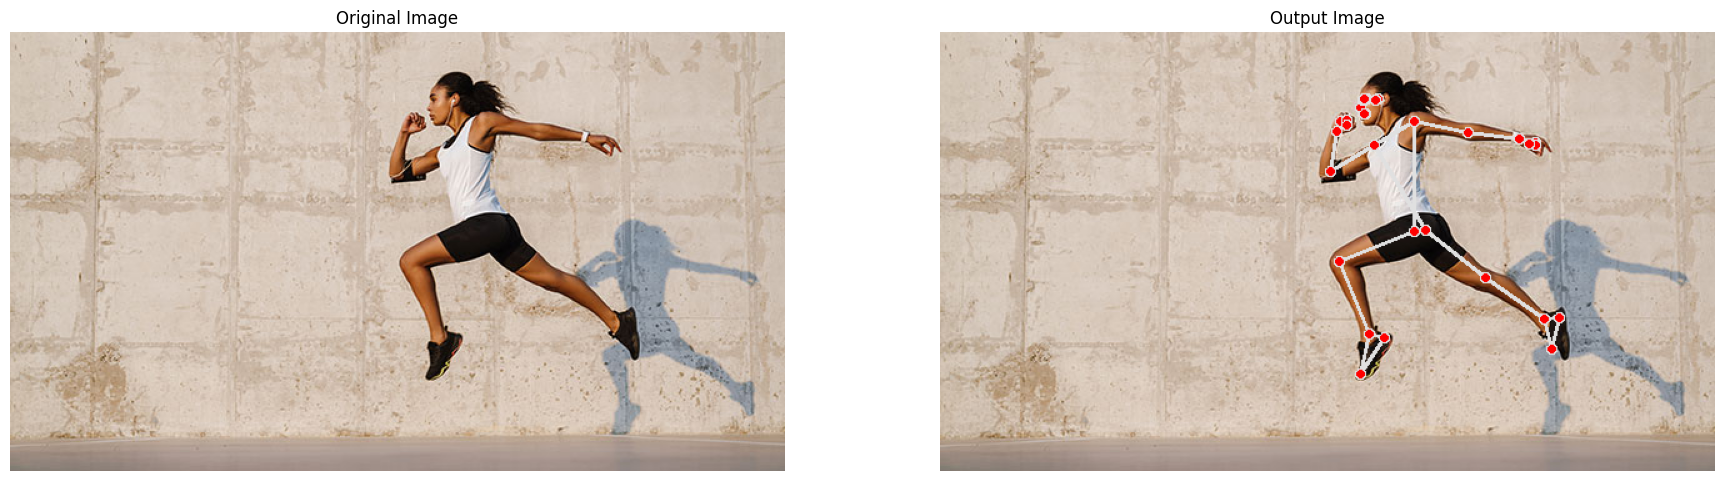

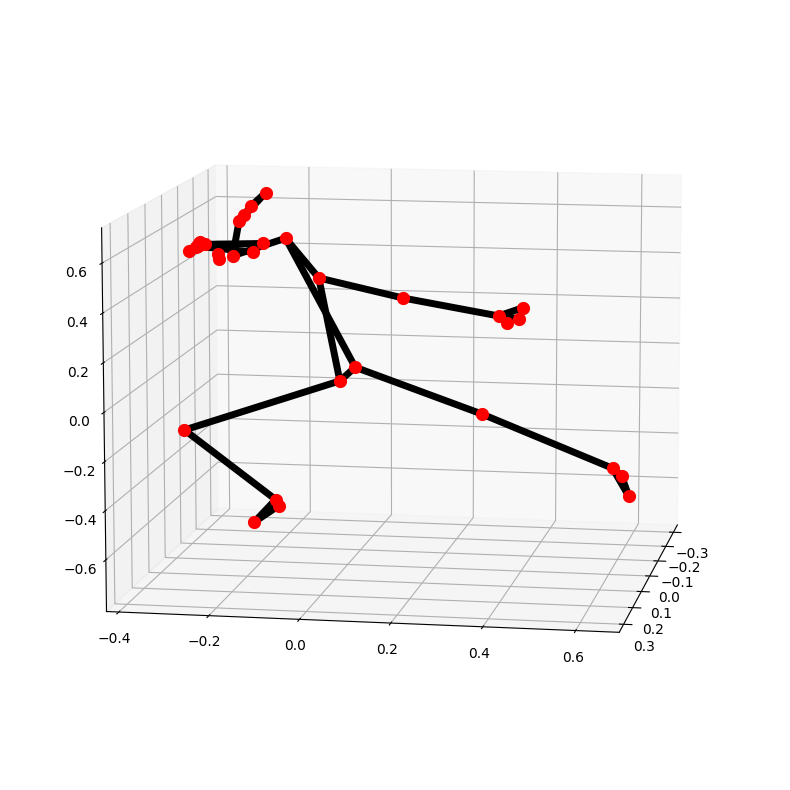

In [10]:
# Read another sample image and perform pose detection on it.
img_2 = cv2.imread('Sample Image2.jpg')
detectPose(img_2, pose, display=True)

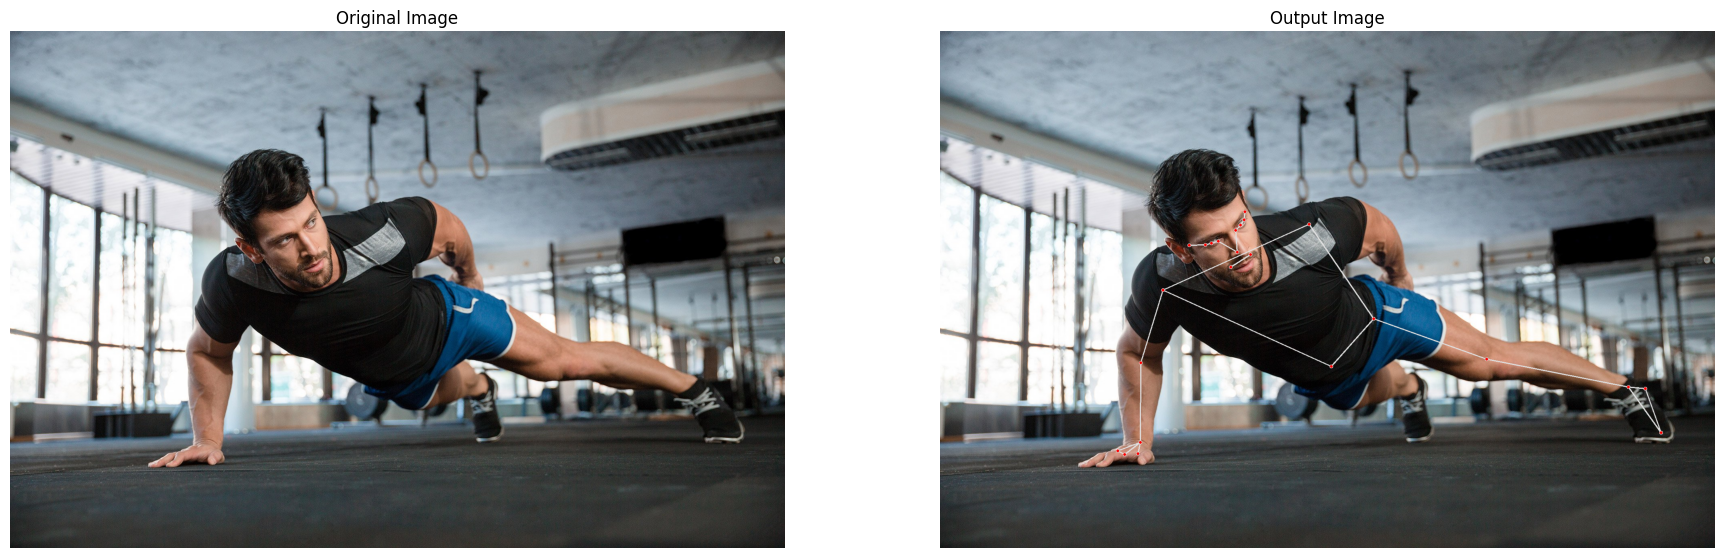

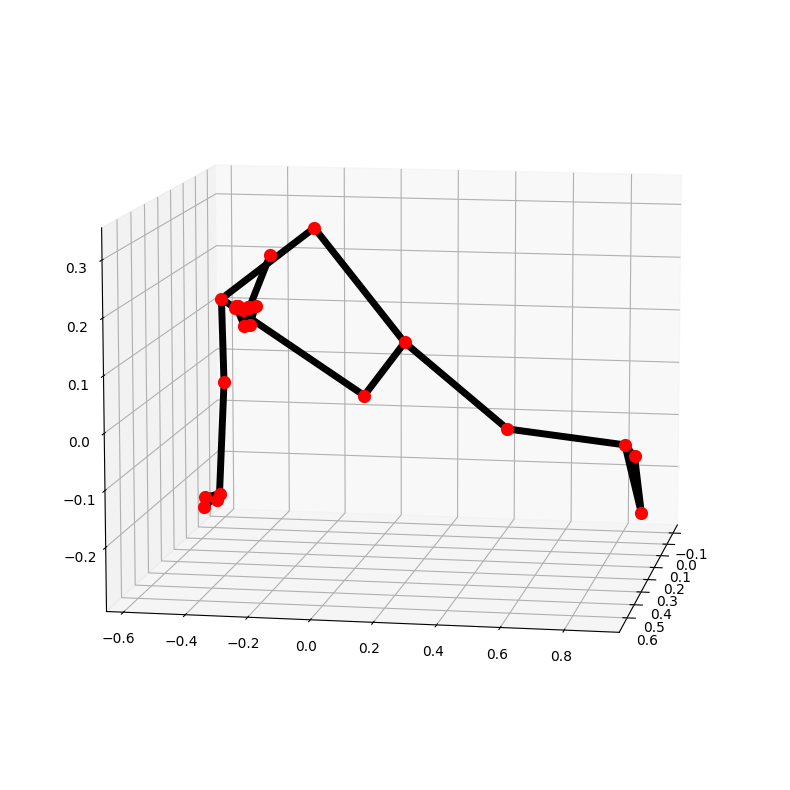

In [11]:
img_3 = cv2.imread('Sample Image3.jpg')
detectPose(img_3, pose, display=True)

In [12]:
def calculateAngle(landmark1, landmark2, landmark3):

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))

    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360

    # Return the calculated angle.
    return angle

In [13]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [14]:
def classifyPose(landmarks, output_image, display=False):

    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)

    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------

    # Get the angle between the left shoulder, elbow and wrist points.
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])

    # Get the angle between the right shoulder, elbow and wrist points.
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])

    # Get the angle between the left elbow, shoulder and hip points.
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points.
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points.
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

    #----------------------------------------------------------------------------------------------------------------

    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------

    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose'

    #----------------------------------------------------------------------------------------------------------------

    # Check if it is the T pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                # Specify the label of the pose that is tree pose.
                label = 'T Pose'

    #----------------------------------------------------------------------------------------------------------------

    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------

    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'

    #----------------------------------------------------------------------------------------------------------------

    # Check if the pose is classified successfully
    if label != 'Unknown Pose':

        # Update the color (to green) with which the label will be written on the image.
        color = (0, 255, 0)

    # Write the label on the output image.
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

    # Check if the resultant image is specified to be displayed.
    if display:

        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

    else:

        # Return the output image and the classified label.
        return output_image, label

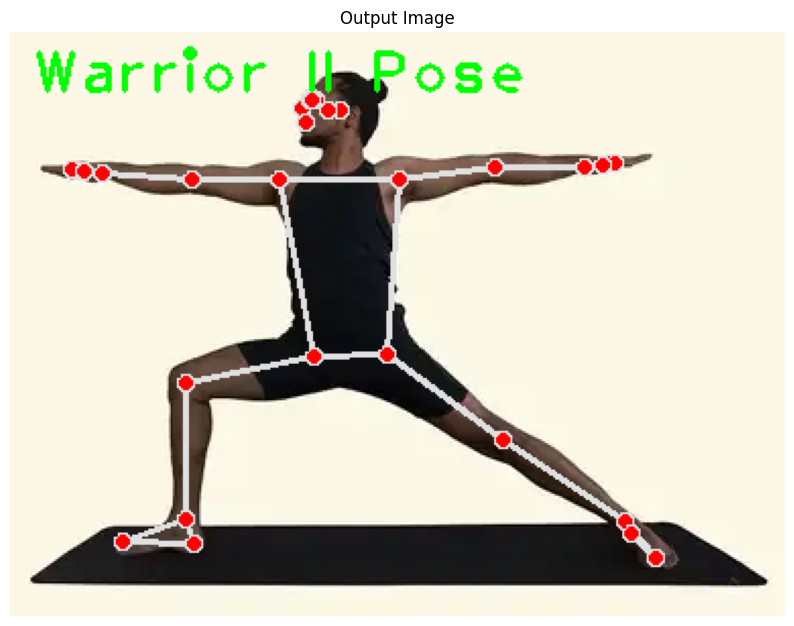

In [15]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('Warrior_1')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

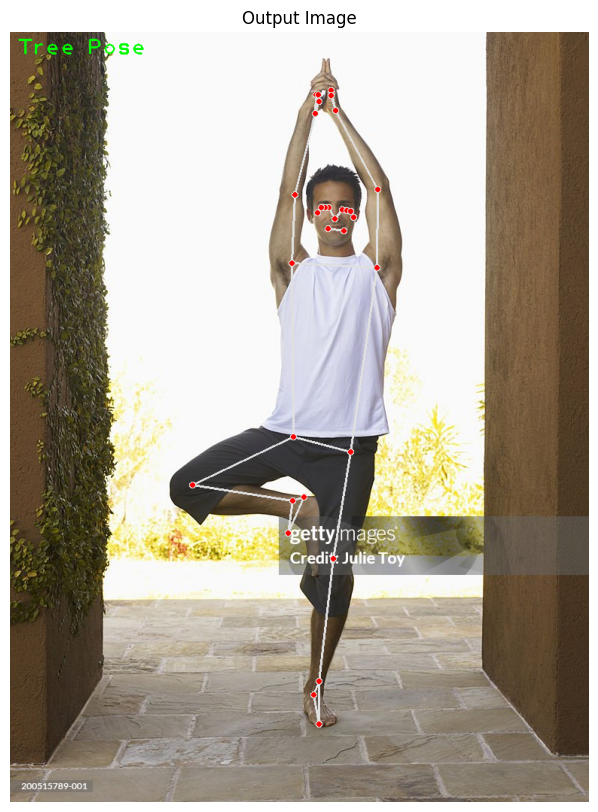

In [16]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('Tree_1.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

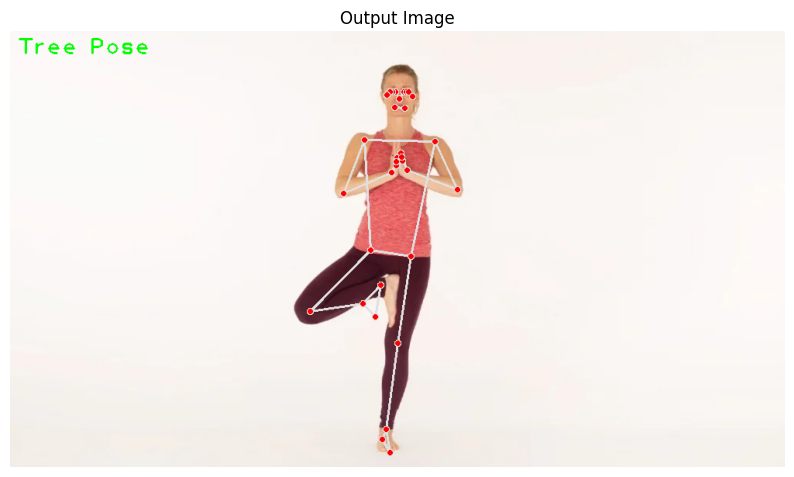

In [17]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('Tree_2.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

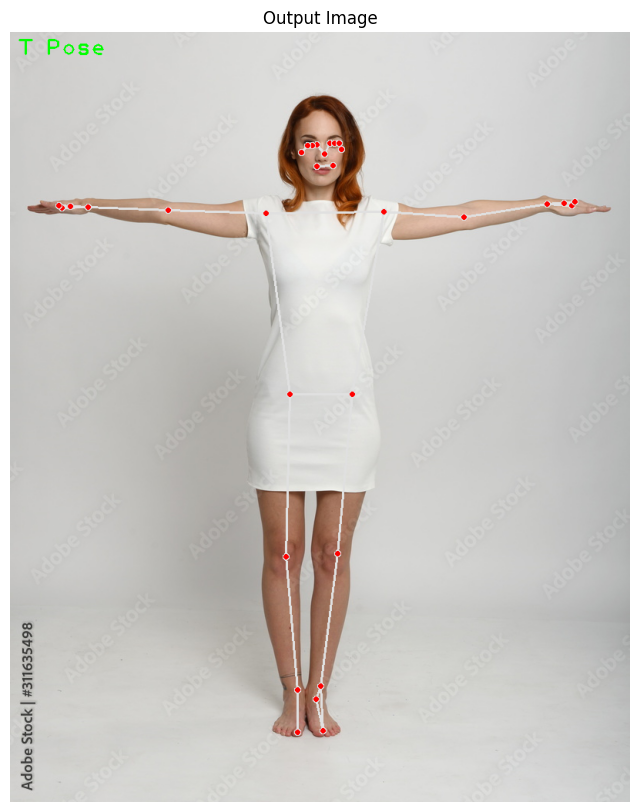

In [18]:
# Read another sample image and perform pose classification on it.
image = cv2.imread('T_1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

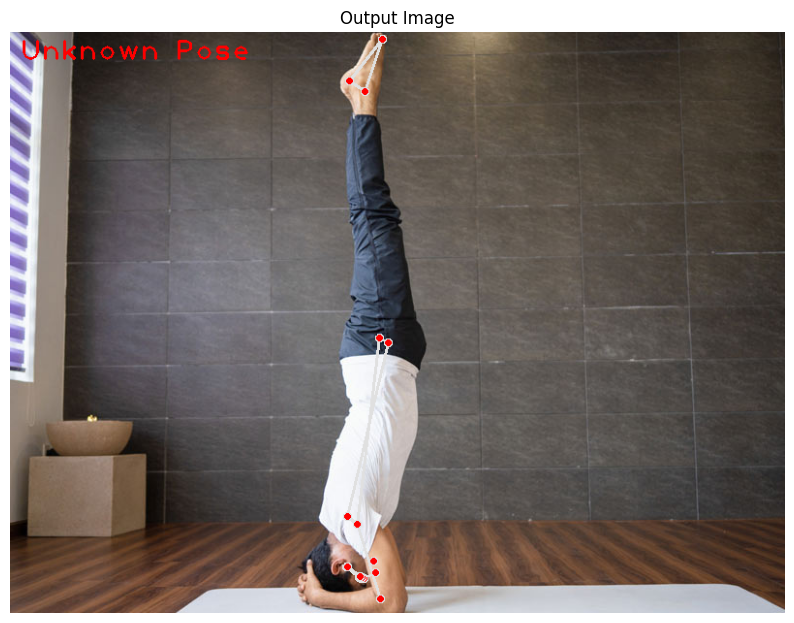

In [19]:
# Read another sample image and perform pose classification on it.
image = cv2.imread('S_1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)